
Goal is to build a synthetic data generation model using the existing data provided by the company.

In [1]:
#Loading the required packages
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
#importing the data
wine=pd.ExcelFile(r'C:\Users\ADMIN\AI-ML\7.Unsupervised Learning\Project week\Part2 - Company.xlsx')
wine.sheet_names
wine = wine.parse("Sheet1")
wine.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [3]:
row, column = wine.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 61 rows and 5 columns


In [4]:
#make a copy of the data
wi=wine.copy()

In [5]:
#dropping the target variable
wine=wine.drop('Quality',axis=1)

In [6]:
#checking for data types
print('The data type of each attribute: \n')
wine.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
A    61 non-null int64
B    61 non-null int64
C    61 non-null int64
D    61 non-null int64
dtypes: int64(4)
memory usage: 2.0 KB


In [7]:
print('The Target Variable has set 18 missing values \n')
wine.isnull().sum()

The Target Variable has set 18 missing values 



A    0
B    0
C    0
D    0
dtype: int64

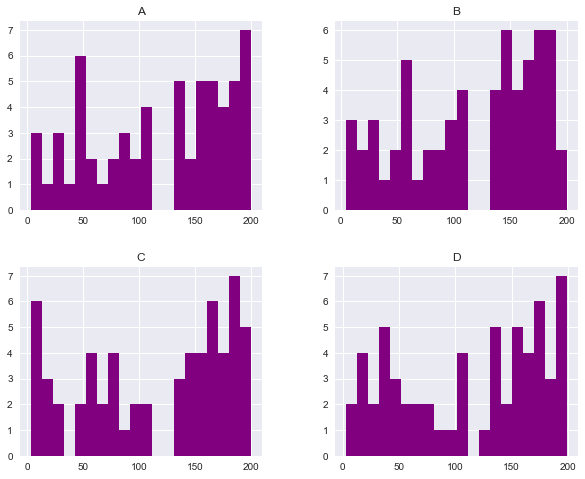

In [8]:
#checking the distribution of the data points
wine.hist(bins = 20, figsize = (10, 8), color = 'purple')
plt.show()

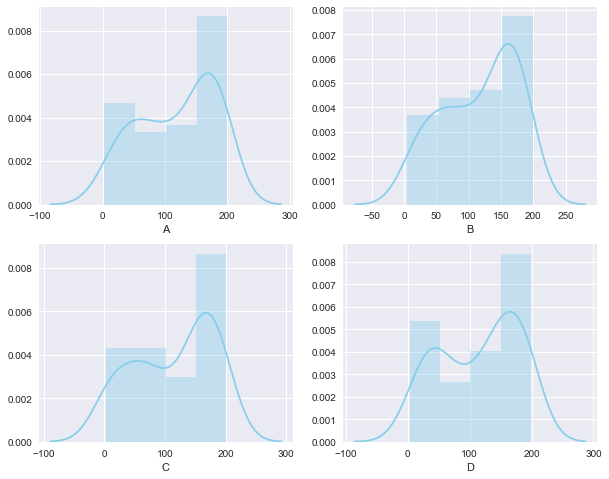

In [9]:
#checking for the density of the variable
plt.figure(figsize=(10, 8))
col = 1
for i in wine.columns:
    plt.subplot(2, 2, col)
    sns.distplot(wine[i], color = 'skyblue')
    col += 1 

observation : the chemical compositions are on the same scales between 0 to 200

In [10]:
#scaling the numeric variables
w1 = wine.apply(zscore)
w1.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [11]:
#checking for the distribution of the targrt variables
wi['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

## 1.Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

In [12]:
#applying kmeans with 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(w1)
labels = k_means.labels_

In [13]:
# Calculating silhouette_score
silhouette_score(w1,labels)

0.6891674125195145

In [14]:
#attaching the cluster labels to the original dataset
wi["Quality_k"] = labels

In [15]:
#checking for the first 15 observations
wi.head(15)

,A,B,C,D,Quality,Quality_k
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
5,153,140,154,199,NaN,1
6,34,28,78,22,Quality A,0
7,191,144,143,154,NaN,1
8,160,181,194,178,Quality B,1
9,145,178,158,141,NaN,1


In [16]:
#renaming the cluster labels
wi['Quality_k'] = wi['Quality_k'].replace({0: 'Quality A', 1: 'Quality B'})

In [17]:
#checking for datatypes
wi.dtypes

A             int64
B             int64
C             int64
D             int64
Quality      object
Quality_k    object
dtype: object

In [18]:
#dropping na rows
wn=wi.dropna()

In [19]:
#checking for the shape
wn.shape

(43, 6)

In [20]:
#using the cluster labels and actual target labels to check for accuracy
pred = wn['Quality_k']
actual=wn['Quality']

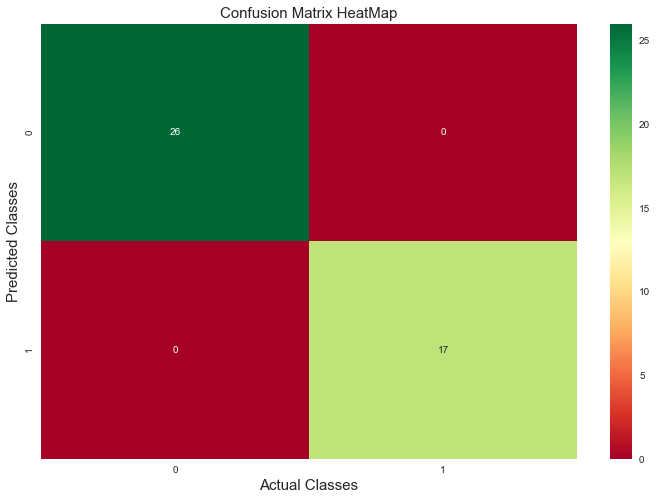

In [21]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(actual, pred)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);

There appears to be no misclassification when checking the it with the non missing target variables and the predicted clusters,
Hence the new labels can be used as a target variable